<a href="https://colab.research.google.com/github/SimplySonu/Image-Classification-using-CNN/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Image Classification Using Convolution Neural Network</b>



Importing required modules 

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the cifar10 dataset from keras and splitting it for training and testing
<br>In this dataset there are 10 class labels to predict
There are 50000 training records and 10000 testing records. 
<br>
The class labels are listed below for reference.<br>
1) airplane									
2) automobile								
3) bird									
4) cat									
5) deer									
6) dog							
7) frog								
8) horse										
9) ship							
10) truck

In [ ]:
#the cifar10 data is already splitted into training records and testing records
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

Exploring the the training and testing records using shape an reshape functions<br>
so that we get a better overview on our dataset<br>
shape function gives the shape of the dataset, 
<br>
In the below given code we have the shape as <b>(50000,32,32,3)</b><br>
where <b>50000</b> is the rows<br>
<b>32x32</b> is the image matrix<br> 
and <b>3</b> signifies that it is a color image(RGB)   

In [ ]:
X_train.shape

(50000, 32, 32, 3)

y train has only the output class i.e rows and class label so the shape is (50000,1), In which 50000 signifies rows and 1 is the column.

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [ ]:
#reshape function is used to reshape the array dimension
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Defining a function that takes X and Y values either it can be from training record or testing record for plotting a image<br>
X implies image matrix ,
y implies the class label,
index implies the index of the class label which is been plotted 

In [ ]:
def sample_image(X,y, index):
  plt.figure(figsize=(14,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

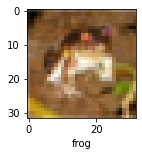

In [ ]:
#Ploting a image from training record
sample_image(X_train, y_train, 0)

<b>DATA NORMALIZAITON</b><br>
Normalizing the values of training and testing records<br>
I hav divided the values by 255 since the values of color ranges from 0 - 255 <br> Since this normalizaion would maxe the computation more feasible and easy


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Next step is to built our cnn model from keras library from model.sequentail function<br>
<br>Sequential<br>
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.<br>
1) To the first layer we have added <b>Conv2D</b> matrix layer(A Convolutional neural network is a neural network that has one or more convolutional layers and are used mainly for image processing, classification, segmentation and also for other auto correlated data. A convolution is essentially sliding a filter over the input)<br> that takes the nuber of filters to be used, the filter size, activation function, inpute shape. <br>
In our case we hav used 20 filters of size (2x2) matrix,<br> Relu activation function that is a linear function that will output the input directly if it is positive, otherwise, it will output zero, so basically it is an normalizing function,<br> and inpute shape(32x32x3) of our image that is shown in the above cell <br>
<br>
2) To the second layer i have used MaxPooling function for the pooliing layer that is of size (2x2) matrix<br>
MaxPooling:-Max pooling is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned

3) i have repeated the first and and second step again(This step can be performed any numbers of time depending on our model)<br>
NOTE:- <b>we need to pass the input shape only for the first time in Conv2D function </b> 

4)Next i have Flattend the matrix using Flatten function meaning -- converting the data into a 1-dimensional array for inputting it to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.<br>
<br>
5) Next layer is the neural network layer <b>layer.dense(100,activation='relu')</b> that consist of 100 hidden neurons for updating the weights and i have used relu as the activation function.This layer helps the model to learn and predict the output accurately
6) Last layer is the output layer <b>(layers.Dense(10,activation="softmax"))</b> in which 10 specifies class label, and used a softmax activation function.




In [ ]:
cnn =  models.Sequential([
                          #using convolution layer with 32 filters of size(3*3) and activation function "relu" and the input image of shape (32,32,3)
                          #cnn layer
                          #input_shape should be passed only in the initial layer of cnn
                          layers.Conv2D(filters=20, kernel_size=(2,2), activation='relu',input_shape=(32,32,3)),
                          layers.MaxPooling2D((2,2)),
                          
                          layers.Conv2D(filters=20, kernel_size=(2,2), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          
                          layers.Dense(100, activation='relu'), # hidden 64 neurons of dense layer 1
                          layers.Dense(10,activation="softmax")#output layer with 10 class labels 

])

Once the model is ready the next step is to compile and eavaluate the model.

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

Next I have fit the model with training set and training the model for 20 epochs(iterations)<br>The Model is 83 percent accurate<br>
And the model is ready to predict.

In [ ]:
cnn.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7276 - accuracy: 0.3741
Epoch 2/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2845 - accuracy: 0.5437
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1133 - accuracy: 0.6075
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0269 - accuracy: 0.6387
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9553 - accuracy: 0.6658
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8913 - accuracy: 0.6875
Epoch 7/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8406 - accuracy: 0.7042
Epoch 8/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8015 - accuracy: 0.7196
Epoch 9/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7606 - accuracy: 0.7314
Epoch 10/20
1563/1563 [==============================] - 30s 19m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1400 - accuracy: 0.6664


[1.1400116682052612, 0.6664000153541565]

In [ ]:
#converting y_test record to one dimension
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Next predict the labels of the data values on the basis of the trained model. The predict() function accepts only a single argument which is usually the data to be tested.<br>
so i have predected for all the test record and displaying the first 5 image matrix

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.07604409e-06, 1.05414565e-05, 5.05497737e-04, 3.59187841e-01,
        1.33194306e-04, 6.39323294e-01, 7.90477381e-04, 3.80743295e-05,
        4.14640544e-06, 1.84614316e-06],
       [1.06819300e-03, 3.10044318e-01, 4.40227410e-09, 7.01811498e-09,
        5.93541771e-10, 8.48194459e-10, 1.49296020e-10, 1.10582006e-08,
        6.87827945e-01, 1.05957815e-03],
       [7.91070890e-03, 1.96030773e-02, 7.30448710e-06, 2.87093317e-05,
        1.45227386e-06, 3.31116837e-07, 6.55204668e-10, 1.45339880e-06,
        9.55487728e-01, 1.69592053e-02],
       [3.92428547e-01, 6.52367016e-04, 2.87988572e-03, 7.02368270e-04,
        1.74936955e-03, 5.06824326e-05, 6.81657475e-05, 1.40533748e-05,
        6.01330101e-01, 1.24412065e-04],
       [1.31326274e-08, 1.41127521e-09, 3.97225143e-03, 4.98819798e-02,
        2.15930194e-01, 1.04072233e-05, 7.30205178e-01, 2.61386788e-08,
        1.54681743e-08, 5.08729343e-11]], dtype=float32)

Iterating over all the list of y_pred values that is of 2Dimension array and taxing only the index of the maximum value from all the list and storing it in a variable(y_predClass) and displaying the first five index value that the model has predicted

In [ ]:
y_predClasses = [np.argmax(element) for element in y_pred]
print(y_predClasses[0:5])
print(y_test[:5])

[5, 8, 8, 8, 6]
[3 8 8 0 6]


The first five class label index that the model has predicted are <br>[5,8,8,8,6] and the actual class label index which is stored in y_test are <br>[3,8,8,0,6] <br>
if we compare both the list we see that the model has correctly predicted 3 class

Let's see an example below


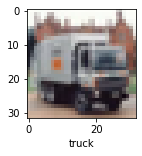

In [ ]:
#plotting image from test record of 11th index

sample_image(X_test,y_test,11)

The model has correctly predicted the image as truck

In [ ]:
#class that model has predicted for the 11th image from the test record 
classes[y_predClasses[11]]

'truck'